In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
# Amr Ahmed

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Copy of SVM_Data.csv to Copy of SVM_Data.csv


In [6]:
data = pd.read_csv('Copy of SVM_Data.csv')

In [7]:
data.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [9]:
data.isnull().sum()

,0
Med_1_mL,0
Med_2_mL,0
Virus Present,0


In [10]:
data.duplicated().sum()

0

In [86]:
from mpl_toolkits.mplot3d import Axes3D


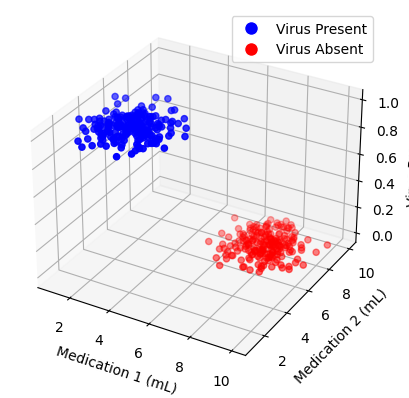

In [92]:
# Create the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define colors for Virus Present (1) and Virus Absent (0)
colors = ['r' if label == 0 else 'b' for label in data['Virus Present']]

# Scatter plot of the data points
ax.scatter(data['Med_1_mL'], data['Med_2_mL'], data['Virus Present'], c=colors, marker='o')

# Labels for axes
ax.set_xlabel('Medication 1 (mL)')
ax.set_ylabel('Medication 2 (mL)')
ax.set_zlabel('Virus Present')

# Add legend
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Virus Absent')
blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='Virus Present')
ax.legend(handles=[blue_patch, red_patch])

plt.show()


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

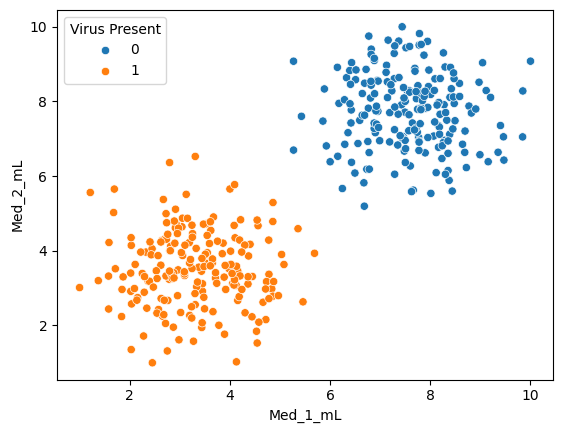

In [14]:
sns.scatterplot(x = 'Med_1_mL', y = 'Med_2_mL', hue = 'Virus Present', data = data)

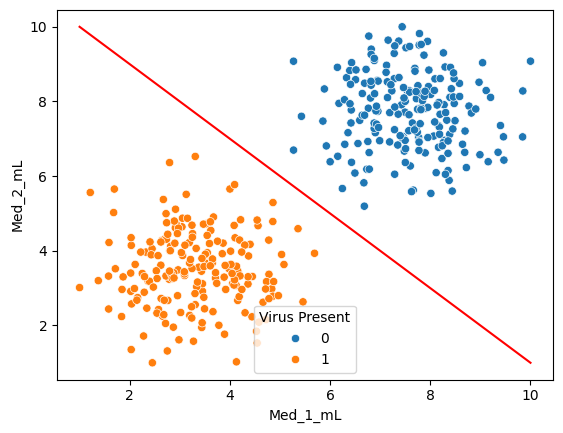

In [16]:
sns.scatterplot(x = 'Med_1_mL', y = 'Med_2_mL', hue = 'Virus Present', data = data)
x = np.linspace(1,10, 100)
b = 11
m = -1
y = m * x + b

plt.plot(x, y, color = 'red')

In [18]:
x = data.drop(['Virus Present'], axis = 1)
y = data['Virus Present']

In [20]:
from sklearn.svm import SVC

In [25]:
model1 = SVC(kernel = 'linear')
model1.fit(x,y)

SVC(kernel='linear')

In [26]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

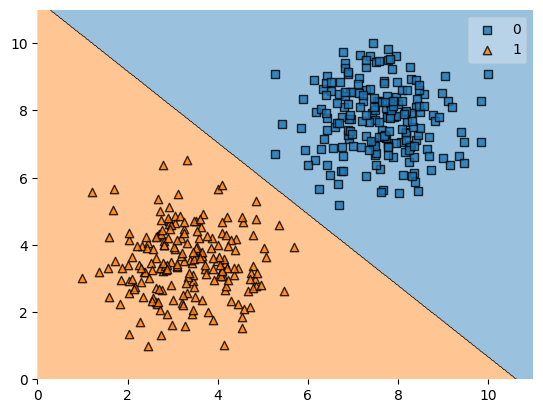

In [27]:
x = np.array(x)
y = np.array(y)
plot_decision_regions(x,y, clf = model1)

In [28]:
model2 = SVC()

In [66]:
params = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'C' :[0.1, 0.01, 1],
    'gamma' : [0.1, 0.01, 1],
    'degree' : [2,3,4],
    'tol' : [0.1, 0.01, 1],
    'max_iter' : [-1, 100, 200]
}

In [67]:
gs_model = GridSearchCV(model2, params)

In [68]:
gs_model.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

GridSearchCV(estimator=SVC(C=0.1, gamma=0.1, kernel='linear'),
             param_grid={'C': [0.1, 0.01, 1], 'degree': [2, 3, 4],
                         'gamma': [0.1, 0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'max_iter': [-1, 100, 200], 'tol': [0.1, 0.01, 1]})

In [69]:
gs_model.best_estimator_

SVC(C=0.1, degree=2, gamma=0.1, kernel='linear', tol=0.1)

In [70]:
model2 = SVC(C=0.1, gamma=0.1, kernel='linear', max_iter=-1, tol=0.1, degree = 2)

In [71]:
model2.fit(x,y)

SVC(C=0.1, degree=2, gamma=0.1, kernel='linear', tol=0.1)

<Axes: >

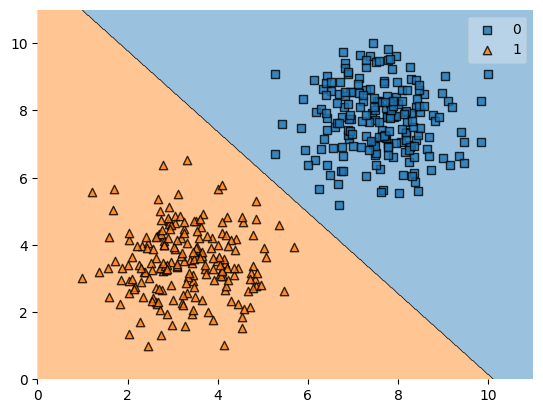

In [72]:
plot_decision_regions(x,y, clf = model2)

<Axes: >

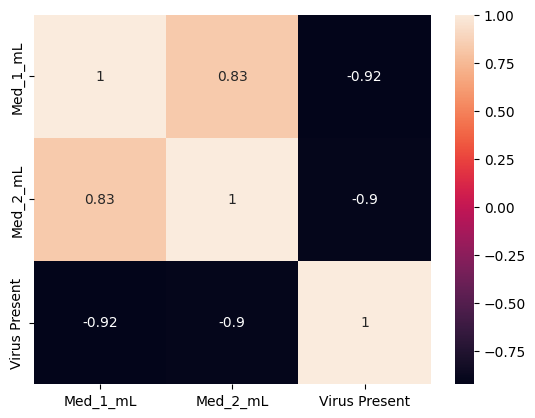

In [78]:
sns.heatmap(data.corr(), annot = True)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [74]:
y_pred = model2.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_test, y_pred)


1.0

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[42,  0],
       [ 0, 38]])

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        38

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

